# Group Assignment Part 2 - Week 11

## Sentiment Analysis using Python

### Step 1: Install Required Libraries

In [2]:
#!pip install pandas nltk textblob seaborn matplotlib

### Step 2: Import Libraries and Load Data

In [3]:
import pandas as pd
import nltk
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\Users\gusta\AppData\Local\Temp\ipykernel_2784\1518600790.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Step 3: Import Dataset

In [4]:
df = pd.read_csv('Airline_Reviews.csv')
#df.head()

### Step 4: Data Preparation

In [5]:
# Drop rows where 'Review' is null
df = df.dropna(subset=['Review'])

In [6]:
# Convert review text to lowercase
df['Review'] = df['Review'].str.lower()

In [7]:
# Convert 'Review Date' to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

In [8]:
# Extract the year
df['Year'] = df['Review Date'].dt.year

### Step 5: Download NLTK Library

In [9]:
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[

### Step 6: Tokenize 'Review Text'

In [10]:
stop_words = set(stopwords.words('english'))

# Define function to clean text
def clean_review(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalpha() and word not in stop_words])

# Apply Clean Review Function
df['Cleaned_Review'] = df['Review'].apply(clean_review)

### Step 7: Apply the Sentiment Analysis

In [11]:
# Define function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment function
df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

### Step 8: Categorize Sentiment

In [12]:
# Define function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization function
df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

### Step 9: Identify Keywords

In [17]:
from collections import Counter
# Combine all reviews into one large string
all_reviews = ' '.join(df['Cleaned_Review'])

# Tokenize the words
tokens = word_tokenize(all_reviews)

# Filter out stop words and non-alphabetic tokens
keywords = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count frequency of each keyword
keyword_freq = Counter(keywords)

# Print the most common keywords
print(keyword_freq.most_common(20))

[('flight', 42553), ('airline', 12821), ('service', 12758), ('time', 12370), ('us', 9526), ('would', 9455), ('one', 8574), ('airport', 8486), ('staff', 8415), ('hours', 7947), ('flights', 7633), ('get', 7545), ('plane', 7248), ('seats', 6903), ('good', 6901), ('crew', 6852), ('air', 6730), ('seat', 6561), ('food', 6468), ('even', 6438)]


### Step 10: Analyze Sentiment Trends

#### Overall Sentiment Distribution

C:\Users\gusta\AppData\Local\Temp\ipykernel_2784\2805947965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Category', palette='viridis')


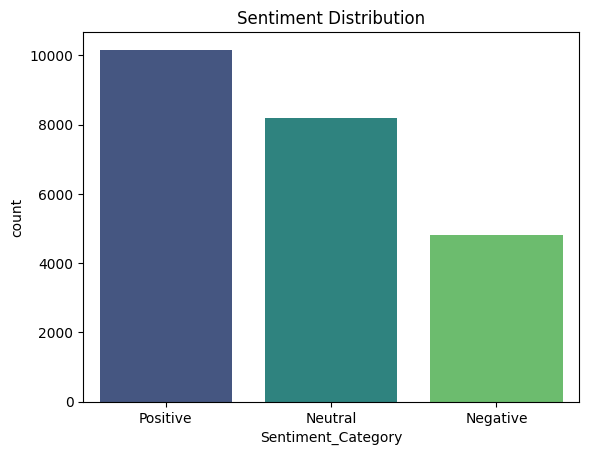

In [14]:
# Plot overall sentiment distribution
sns.countplot(data=df, x='Sentiment_Category', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

#### Average Sentiment Score by Year

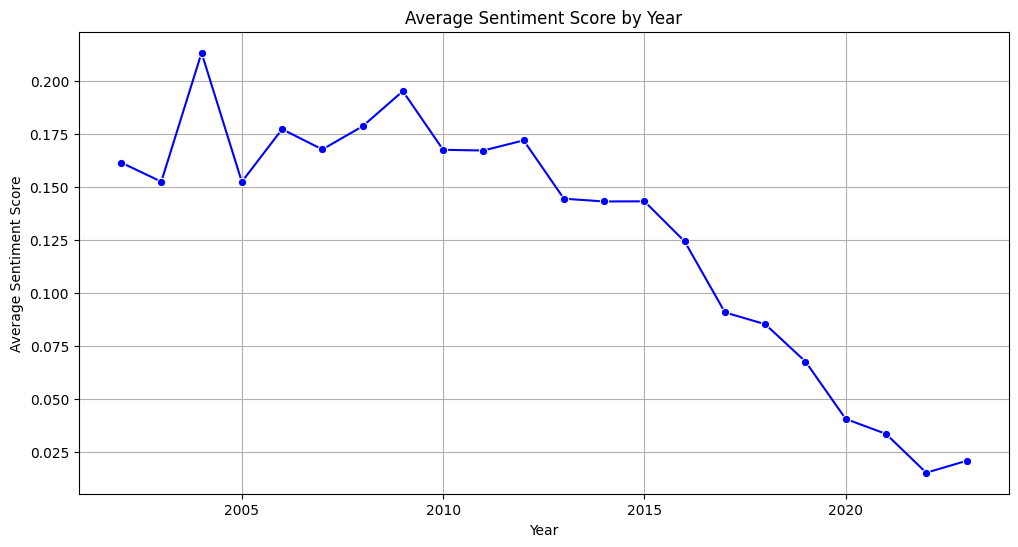

In [15]:
# Group by Year and calculate the mean sentiment score for each year
yearly_sentiment = df.groupby('Year')['Sentiment'].mean().reset_index()

# Plot the yearly average sentiment trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sentiment, x='Year', y='Sentiment', marker='o', color='b')
plt.title('Average Sentiment Score by Year')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Year')
plt.grid(True)
plt.show()

#### Average Sentiment Score by Year, Type of Traveler

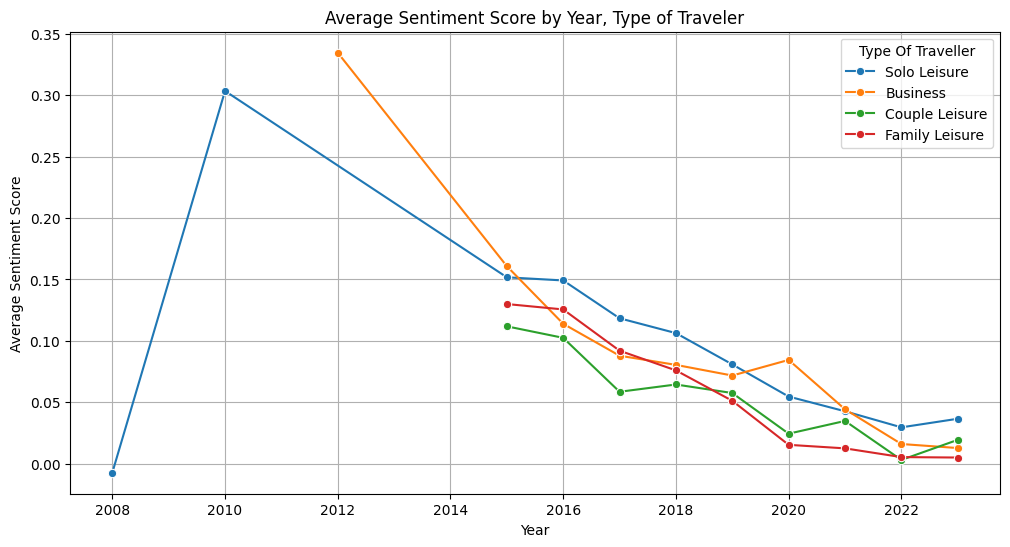

In [20]:
yearly_traveller_sentiment = df.groupby(['Year', 'Type Of Traveller'])['Sentiment'].mean().reset_index()

# Plot sentiment trend by year for each traveler type
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_traveller_sentiment, x='Year', y='Sentiment', hue='Type Of Traveller', marker='o')
plt.title('Average Sentiment Score by Year, Type of Traveler')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Year')
plt.grid(True)
plt.show()

#### Focus on 2015-2023

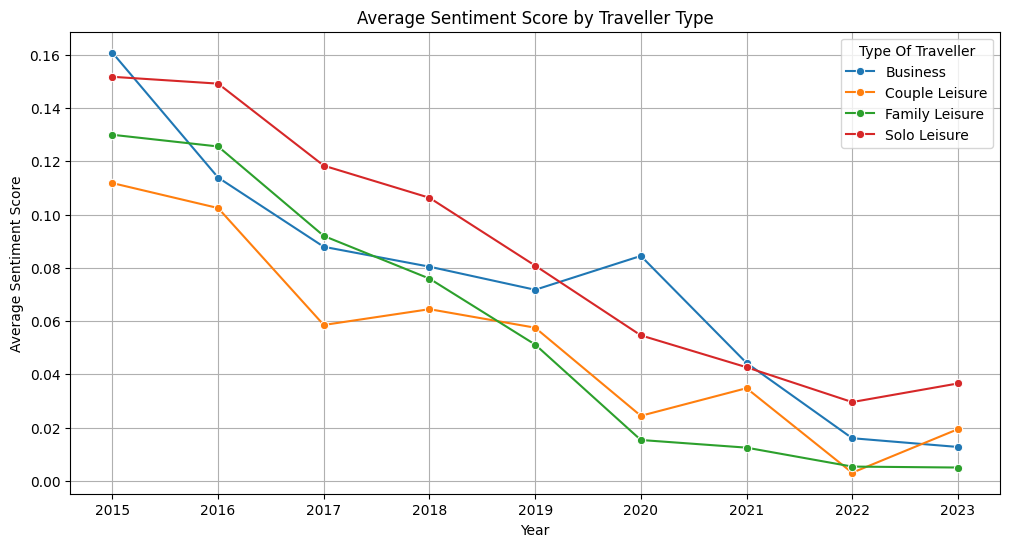

In [21]:
# Filter data for years greater than 2014
df_filtered = df[df['Year'] > 2014]

# Average Sentiment Score by Year and Type Of Traveler
yearly_traveller_sentiment = df_filtered.groupby(['Year', 'Type Of Traveller'])['Sentiment'].mean().reset_index()

# Plot sentiment trend by year for each traveler type
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_traveller_sentiment, x='Year', y='Sentiment', hue='Type Of Traveller', marker='o')
plt.title('Average Sentiment Score by Traveller Type')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Year')
plt.grid(True)
plt.show()

#### Sentiment by Type of Traveler

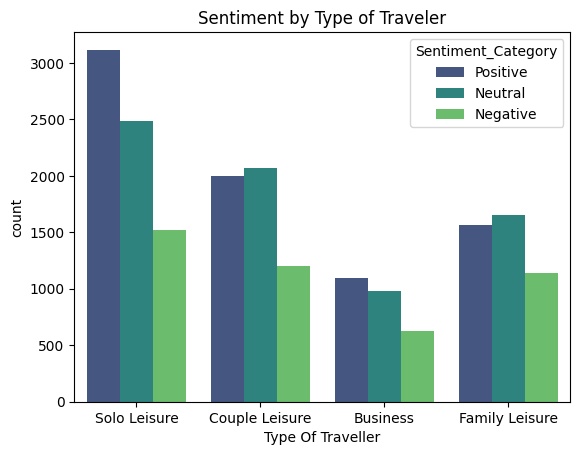

In [23]:
sns.countplot(data=df, x='Type Of Traveller', hue='Sentiment_Category', palette='viridis')
plt.title('Sentiment by Type of Traveler')
plt.show()

#### Sentiment by Seat Comfort

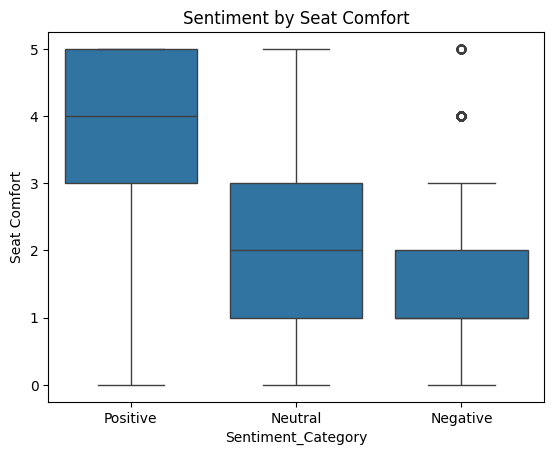

In [24]:
sns.boxplot(data=df, x='Sentiment_Category', y='Seat Comfort')
plt.title('Sentiment by Seat Comfort')
plt.show()